In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
import string


In [2]:
customer_service_enquiry = pd.read_csv('Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv')

In [3]:
customer_service_enquiry.shape

(26872, 5)

In [167]:
customer_service_enquiry 

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancelling order order number,ive understood question regarding canceling or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancelling oorder order number,ive informed question canceling order order nu...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchase order number,understood need assistance canceling purchase ...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [168]:
customer_service_enquiry .dtypes

flags                  object
instruction            object
category               object
intent                 object
response               object
cleaned_instruction    object
cleaned_response       object
dtype: object

In [169]:
customer_service_enquiry.isnull().sum()

flags                  0
instruction            0
category               0
intent                 0
response               0
cleaned_instruction    0
cleaned_response       0
dtype: int64

In [170]:
customer_service_enquiry .shape

(12966, 7)

In [171]:
customer_service_enquiry 

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancelling order order number,ive understood question regarding canceling or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancelling oorder order number,ive informed question canceling order order nu...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchase order number,understood need assistance canceling purchase ...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimbursement status,ive understood youre unsure check status reimb...


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'ORDER'), Text(1, 0, 'REFUND'), Text(2, 0, 'ACCOUNT')])

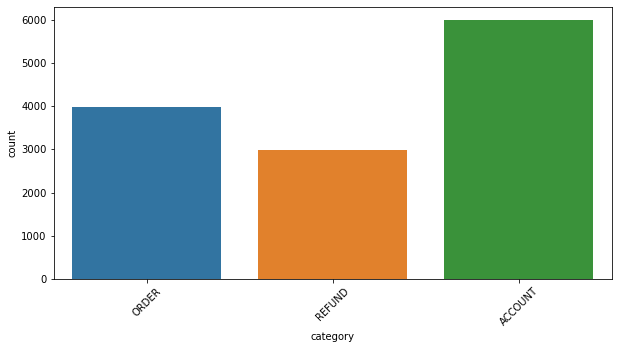

In [172]:
## due to the large scale of dataset, i am going to keep only the categories on which customer reqetsed the question for 

plt.figure(figsize = (10,5))
sn.countplot(customer_service_enquiry['category'])
plt.xticks(rotation = 45)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'cancel_order'),
  Text(1, 0, 'change_order'),
  Text(2, 0, 'check_refund_policy'),
  Text(3, 0, 'create_account'),
  Text(4, 0, 'delete_account'),
  Text(5, 0, 'edit_account'),
  Text(6, 0, 'get_refund'),
  Text(7, 0, 'place_order'),
  Text(8, 0, 'recover_password'),
  Text(9, 0, 'registration_problems'),
  Text(10, 0, 'switch_account'),
  Text(11, 0, 'track_order'),
  Text(12, 0, 'track_refund')])

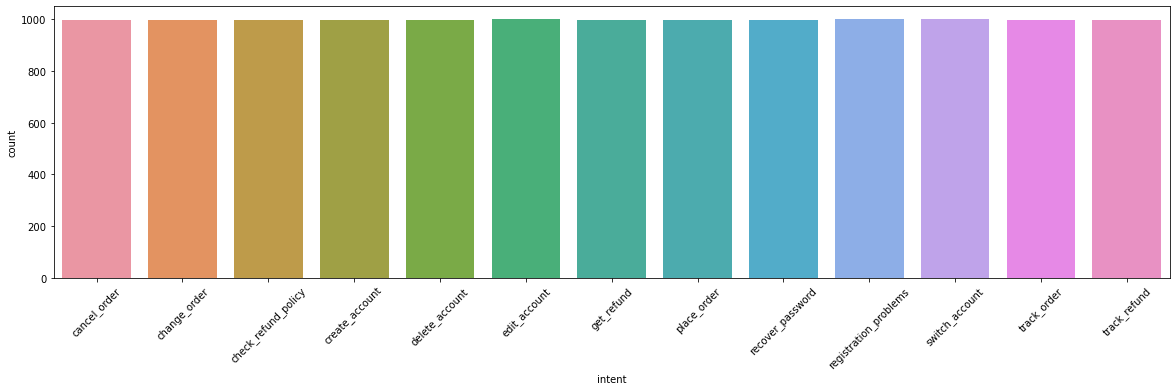

In [173]:
plt.figure(figsize = (20,5))
sn.countplot(customer_service_enquiry['intent'])
plt.xticks(rotation = 45)

In [174]:
customer_service_enquiry = customer_service_enquiry[
    (customer_service_enquiry['category'] == 'ORDER') |
    (customer_service_enquiry['category'] == 'ACCOUNT') |
    (customer_service_enquiry['category'] == 'REFUND')
]

In [175]:
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancelling order order number,ive understood question regarding canceling or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancelling oorder order number,ive informed question canceling order order nu...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchase order number,understood need assistance canceling purchase ...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [13]:
print(customer_service_enquiry .iloc[1000,1])
print(customer_service_enquiry .iloc[5000,1])
print(customer_service_enquiry .iloc[7000,1])
print(customer_service_enquiry .iloc[10000,1])
print(customer_service_enquiry .iloc[11000,1])


want help adding an item to order {{Order Number}}
editing information on {{Account Category}} account
I do not know how I can buy some of your article
i dont know what i have to do to switch to the {{Account Type}} account
help checking the ETA of purchase {{Order Number}}


In [14]:
print(customer_service_enquiry .iloc[5001,4])
print(customer_service_enquiry .iloc[1000,4])



Oh, the thrill of embarking on the remarkable journey of changing information on your esteemed {{Account Category}} account!I feel privileged to be your trusted guide, ready to offer unparalleled support and expert assistance every step of the way. Let's dive into the details together. What specific information would you like to modify? Rest assured, we'll ensure your account reflects the updated details accurately and efficiently.
Thank you for getting in touch to us for assistance with adding an item to your order. We understand the importance of getting your order just right. To help you with this, could you please provide us with the details of the item you would like to add? By having this information, we can ensure that your order is complete and meets your expectations. We appreciate your cooperation and look forward to assisting you further.


In [15]:
def cleaned(text):
  ## Remove substrings
  cleaned_text = re.sub(r'\{\{.*?&$£%\}\}', '', text)
  cleaned_text = cleaned_text.lower()
  # Remove URLs
  cleaned_text = re.sub(r'http\S+', '', cleaned_text)
  # Remove number
  cleaned_text = re.sub(r'\d+', '', cleaned_text)
  # Remove extra white space
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
  # Remove non-alphanumeric characters
  cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
  # Remove punctuation
  cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

  ## Removing stopwords
  stop_words = set(stopwords.words('english'))
  tokenization = cleaned_text.split()
  tokenization = [word for word in tokenization if word not in stop_words]
  cleaned_text = ' '.join(tokenization)

  # Lemmatization (replace stemming)
  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  cleaned_text_tokens = cleaned_text.split()
  cleaned_text_tokens = [lemmatizer.lemmatize(word) for word in cleaned_text_tokens]
  cleaned_text = ' '.join(cleaned_text_tokens)

  return cleaned_text
    
    
        

In [16]:
customer_service_enquiry

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


In [17]:
customer_service_enquiry['cleaned_instruction'] = customer_service_enquiry['instruction'].apply(cleaned)

C:\Users\User\AppData\Local\Temp\ipykernel_10216\138690156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_service_enquiry['cleaned_instruction'] = customer_service_enquiry['instruction'].apply(cleaned)


In [18]:
customer_service_enquiry.iloc[0,1]

'question about cancelling order {{Order Number}}'

In [19]:
customer_service_enquiry.iloc[0,5]

'question cancelling order order number'

In [20]:
customer_service_enquiry['cleaned_response'] = customer_service_enquiry['response'].apply(cleaned)

C:\Users\User\AppData\Local\Temp\ipykernel_10216\124284478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_service_enquiry['cleaned_response'] = customer_service_enquiry['response'].apply(cleaned)


In [21]:
customer_service_enquiry.iloc[1000,4]

'Thank you for getting in touch to us for assistance with adding an item to your order. We understand the importance of getting your order just right. To help you with this, could you please provide us with the details of the item you would like to add? By having this information, we can ensure that your order is complete and meets your expectations. We appreciate your cooperation and look forward to assisting you further.'

In [22]:
customer_service_enquiry.iloc[1000,6]

'thank getting touch u assistance adding item order understand importance getting order right help could please provide u detail item would like add information ensure order complete meet expectation appreciate cooperation look forward assisting'

In [23]:
customer_service_enquiry  

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancelling order order number,ive understood question regarding canceling or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancelling oorder order number,ive informed question canceling order order nu...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchase order number,understood need assistance canceling purchase ...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [24]:
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancelling order order number,ive understood question regarding canceling or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancelling oorder order number,ive informed question canceling order order nu...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchase order number,understood need assistance canceling purchase ...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [25]:
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancelling order order number,ive understood question regarding canceling or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancelling oorder order number,ive informed question canceling order order nu...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchase order number,understood need assistance canceling purchase ...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [26]:
customer_service_enquiry_ml = customer_service_enquiry[['cleaned_instruction', 'cleaned_response']]

In [27]:
customer_service_enquiry_ml

,cleaned_instruction,cleaned_response
0,question cancelling order order number,ive understood question regarding canceling or...
1,question cancelling oorder order number,ive informed question canceling order order nu...
2,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,need cancel purchase order number,understood need assistance canceling purchase ...
4,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...
26867,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [28]:
# Identify rows where the instruction relates to canceling or purchase
cancel_related_instructions = customer_service_enquiry_ml[customer_service_enquiry_ml['cleaned_instruction'].str.contains("cancel|purchase|refund", case=False)]

# Print the data frame with potentially relevant instructions
print(cancel_related_instructions)

                                     cleaned_instruction  \
0                 question cancelling order order number   
1                question cancelling oorder order number   
2              need help cancelling puchase order number   
3                      need cancel purchase order number   
4       cannot afford order cancel purchase order number   
...                                                  ...   
26861            expect restitution refund amount dollar   
26863            assistance seeing anything wrong refund   
26865             im waiting rebate refund amount dollar   
26867                waiting rebate refund amount dollar   
26869  im waiting reimbjrsement currency symbolrefund...   

                                        cleaned_response  
0      ive understood question regarding canceling or...  
1      ive informed question canceling order order nu...  
2      sense youre seeking assistance canceling purch...  
3      understood need assistance canceling

In [29]:
customer_service_enquiry_ml

,cleaned_instruction,cleaned_response
0,question cancelling order order number,ive understood question regarding canceling or...
1,question cancelling oorder order number,ive informed question canceling order order nu...
2,need help cancelling puchase order number,sense youre seeking assistance canceling purch...
3,need cancel purchase order number,understood need assistance canceling purchase ...
4,cannot afford order cancel purchase order number,im sensitive fact youre facing financial diffi...
...,...,...
26867,waiting rebate refund amount dollar,thank sharing situation regarding pending reba...
26868,see anything wrong restitution,ensuring accuracy restitution utmost importanc...
26869,im waiting reimbjrsement currency symbolrefund...,firstly genuinely understand importance expect...
26870,dont know see reimbursement status,ive understood youre unsure check status reimb...


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding, Dense, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model






In [31]:
# Load your data
cleaned_instructions = customer_service_enquiry_ml['cleaned_instruction']
cleaned_responses = customer_service_enquiry_ml['cleaned_response']


In [32]:
# Create a tokenizer for both instructions and responses
tokenizer = Tokenizer(num_words=5000)  
tokenizer.fit_on_texts(cleaned_instructions + cleaned_responses)

max_instruction_len = 50 
max_response_len = 50  

In [33]:
# Convert instructions to sequences
instruction_sequences = tokenizer.texts_to_sequences(cleaned_instructions)
# Pad sequences to the same length
padded_instructions = pad_sequences(instruction_sequences, maxlen=max_instruction_len, padding='post')


In [34]:
# Convert responses to sequences
response_sequences = tokenizer.texts_to_sequences(cleaned_responses)
# Pad sequences to the same length
padded_responses = pad_sequences(response_sequences, maxlen=max_response_len, padding='post')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(padded_instructions, padded_responses, test_size=0.2, random_state=42)


In [36]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10372, 50)
y_train shape: (10372, 50)
X_test shape: (2594, 50)
y_test shape: (2594, 50)


In [37]:
# Define the model creation function
def create_model():
    # Encoder
    encoder_inputs = Input(shape=(max_instruction_len,))
    encoder_embedding = Embedding(len(tokenizer.word_index) + 1, 128)(encoder_inputs)
    encoder_lstm = LSTM(256, return_sequences=True)(encoder_embedding)
    encoder_outputs, state_h, state_c = LSTM(256, return_state=True)(encoder_lstm)

    # Decoder
    decoder_inputs = Input(shape=(max_response_len,))
    decoder_embedding = Embedding(len(tokenizer.word_index) + 1, 128)(decoder_inputs)
    decoder_lstm = LSTM(256, return_sequences=True)(decoder_embedding, initial_state=[state_h, state_c])
    decoder_outputs = Dense(len(tokenizer.word_index) + 1, activation='softmax')(decoder_lstm)

    # Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [38]:
# Create the model
model = create_model()


In [39]:
# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      833152      ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 50, 256)      394240      ['embedding[0][0]']              
                                                                                              

In [40]:
# Define EarlyStopping and ReduceLROnPlateau callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose = 1)


In [41]:
# Train the model
history = model.fit([X_train, y_train], y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])
##add and save the model 



Epoch 1/50
260/260 [==============================] - 328s 1s/step - loss: 5.2975 - accuracy: 0.1447 - val_loss: 4.0641 - val_accuracy: 0.2628
Epoch 2/50
260/260 [==============================] - 311s 1s/step - loss: 2.4396 - accuracy: 0.6100 - val_loss: 1.2863 - val_accuracy: 0.8293
Epoch 3/50
260/260 [==============================] - 313s 1s/step - loss: 0.8471 - accuracy: 0.8934 - val_loss: 0.5458 - val_accuracy: 0.9388
Epoch 4/50
260/260 [==============================] - 314s 1s/step - loss: 0.3957 - accuracy: 0.9563 - val_loss: 0.2866 - val_accuracy: 0.9713
Epoch 5/50
260/260 [==============================] - 311s 1s/step - loss: 0.2140 - accuracy: 0.9791 - val_loss: 0.1696 - val_accuracy: 0.9849
Epoch 6/50
260/260 [==============================] - 311s 1s/step - loss: 0.1274 - accuracy: 0.9881 - val_loss: 0.1126 - val_accuracy: 0.9902
Epoch 7/50
260/260 [==============================] - 314s 1s/step - loss: 0.0830 - accuracy: 0.9922 - val_loss: 0.0828 - val_accuracy: 0.9930

In [44]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_test, y_test], y_test)

print("Test Loss:", loss) 
print("Test Accuracy:", accuracy)

82/82 [==============================] - 41s 495ms/step - loss: 0.0188 - accuracy: 0.9988
Test Loss: 0.018780576065182686
Test Accuracy: 0.9987663626670837


In [45]:
# Evaluate the LSTM model on the test set
loss_lstm, accuracy_lstm = model.evaluate([X_test, y_test], y_test)

82/82 [==============================] - 42s 507ms/step - loss: 0.0188 - accuracy: 0.9988


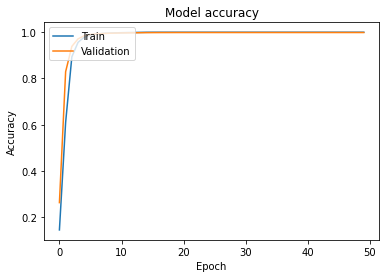

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

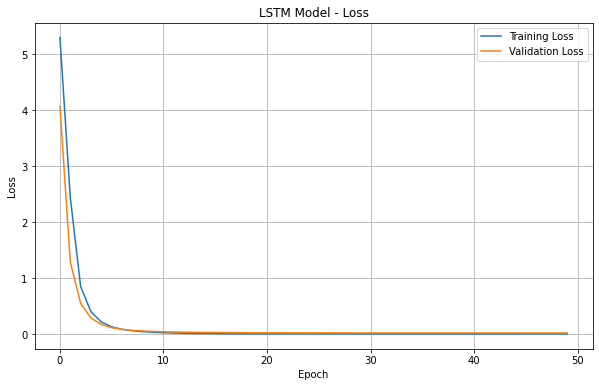

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [48]:

##simpple rnn model 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [49]:
# Load your data (replace with your data loading)
cleaned_instructions = customer_service_enquiry_ml['cleaned_instruction']
cleaned_responses = customer_service_enquiry_ml['cleaned_response']


In [50]:
# Create a tokenizer for both instructions and responses
tokenizer = Tokenizer(num_words=5000)  
tokenizer.fit_on_texts(cleaned_instructions + cleaned_responses)


In [51]:
max_instruction_len = 50  
max_response_len = 50  


In [52]:
# Convert instructions to sequences
instruction_sequences = tokenizer.texts_to_sequences(cleaned_instructions)
# Pad sequences to the same length
padded_instructions = pad_sequences(instruction_sequences, maxlen=max_instruction_len, padding='post')


In [53]:
# Convert responses to sequences
response_sequences = tokenizer.texts_to_sequences(cleaned_responses)
# Pad sequences to the same length
padded_responses = pad_sequences(response_sequences, maxlen=max_response_len, padding='post')

X_train, X_test, y_train, y_test = train_test_split(padded_instructions, padded_responses, test_size=0.2, random_state=42)


In [54]:
# Define the encoder model
encoder_inputs = Input(shape=(max_instruction_len,))
encoder_embedding = Embedding(len(tokenizer.word_index) + 1, 128)(encoder_inputs)
encoder_rnn = SimpleRNN(256, return_sequences=True)(encoder_embedding)
encoder_outputs = encoder_rnn  


In [55]:
# Define the decoder model
decoder_inputs = Input(shape=(max_response_len,))
decoder_embedding = Embedding(len(tokenizer.word_index) + 1, 128)(decoder_inputs)
decoder_rnn = SimpleRNN(256, return_sequences=True)(decoder_embedding)
decoder_outputs = Dense(len(tokenizer.word_index) + 1, activation='softmax')(decoder_rnn)


In [56]:
# Combine encoder and decoder into a single model
model_rnn = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model with 'sparse_categorical_crossentropy' loss
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [57]:
# Print model summary
model_rnn.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 50, 128)      833152      ['input_4[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (None, 50, 256)      98560       ['embedding_3[0][0]']            
                                                                                                  
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                            

In [58]:
# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)


In [59]:
# Train the model
history = model_rnn.fit([X_train, y_train], y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])


Epoch 1/50
260/260 [==============================] - 147s 545ms/step - loss: 5.4427 - accuracy: 0.1340 - val_loss: 4.2455 - val_accuracy: 0.2379
Epoch 2/50
260/260 [==============================] - 141s 541ms/step - loss: 2.3140 - accuracy: 0.6339 - val_loss: 0.8780 - val_accuracy: 0.8950
Epoch 3/50
260/260 [==============================] - 141s 543ms/step - loss: 0.4852 - accuracy: 0.9457 - val_loss: 0.2655 - val_accuracy: 0.9731
Epoch 4/50
260/260 [==============================] - 146s 563ms/step - loss: 0.1730 - accuracy: 0.9827 - val_loss: 0.1294 - val_accuracy: 0.9880
Epoch 5/50
260/260 [==============================] - 140s 539ms/step - loss: 0.0829 - accuracy: 0.9921 - val_loss: 0.0795 - val_accuracy: 0.9929
Epoch 6/50
260/260 [==============================] - 142s 546ms/step - loss: 0.0448 - accuracy: 0.9960 - val_loss: 0.0571 - val_accuracy: 0.9950
Epoch 7/50
260/260 [==============================] - 141s 541ms/step - loss: 0.0252 - accuracy: 0.9981 - val_loss: 0.0451 -

In [67]:
# Evaluate the model
loss_simplernn, accuracy_simplernn = model_rnn.evaluate([X_test, y_test], y_test)


82/82 [==============================] - 23s 279ms/step - loss: 0.0186 - accuracy: 0.9984


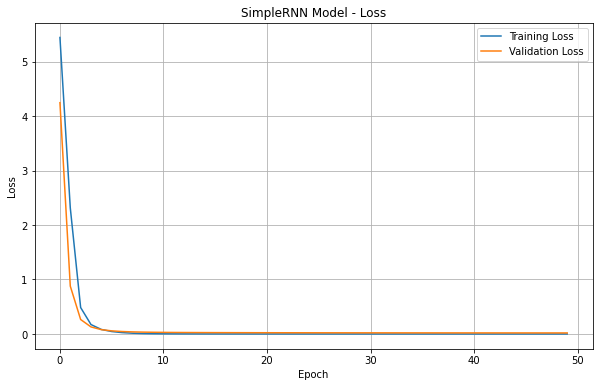

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('SimpleRNN Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

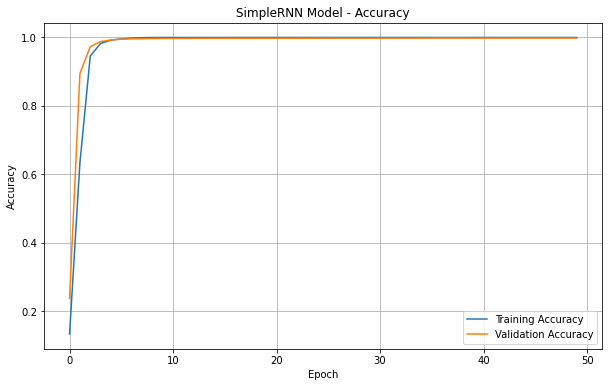

In [69]:
# Similar plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('SimpleRNN Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


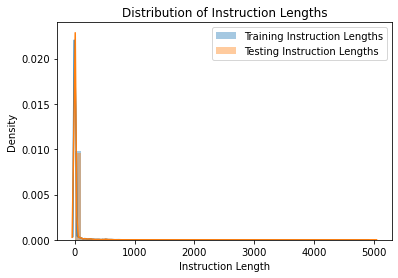

In [70]:
import seaborn as sns

sns.distplot(X_train.flatten(), label='Training Instruction Lengths')
sns.distplot(X_test.flatten(), label='Testing Instruction Lengths')
plt.title('Distribution of Instruction Lengths')
plt.xlabel('Instruction Length')
plt.ylabel('Density')
plt.legend()
plt.show()

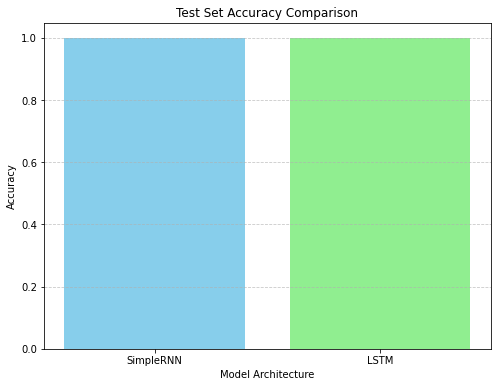

In [408]:
# Create a bar graph
model_names = ['SimpleRNN', 'LSTM']
accuracies = [accuracy_simplernn, accuracy_lstm]  

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Test Set Accuracy Comparison')
plt.xlabel('Model Architecture')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
## both simple rnn and LSTM are giving nearyly over 99 percent of accuracy